<a href="https://colab.research.google.com/github/saguileran/MD-SCPI/blob/main/NoteBooks/Plots_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#@title Github
%%capture

!rm -r /content/MD-SCPI
!git clone https://github.com/saguileran/MD-SCPI

import sys
!{sys.executable} -m pip install ipympl

In [ ]:
!ls "MD-SCPI/PDBs/MC/AS4/300K"

MR-AS4_10_MR-AS4.inpcrd_mc.dat.gz  MR-AS4_5_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_1_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_6_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_2_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_7_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_3_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_8_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_4_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_9_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_10_MR-AS4.inpcrd_mc.dat.gz  MR-AS4_5_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_1_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_6_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_2_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_7_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_3_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_8_MR-AS4.inpcrd_mc.dat.gz
MR-AS4_4_MR-AS4.inpcrd_mc.dat.gz   MR-AS4_9_MR-AS4.inpcrd_mc.dat.gz


In [8]:
import gzip
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from google.colab import output
import numpy as np
import matplotlib as mpl
from scipy.stats import linregress

def ReadGz(path):
  #data = pd.read_csv(path, compression='gzip',  header=4, delimiter="  ")[['#', 'Step', 'Unnamed: 6', 'Unnamed: 7', ' RMSD']].rename({'#':'Step', 'Step':'Energy', 'Unnamed: 6':'RMSD', 'Unnamed: 7':'DX', ' RMSD':'DY'}, axis=1)
  file1 = gzip.open(path)
  a = file1.read()

  array, c = [], 0
  text = str(a).split()[11:]
  head = text[:14] # 20 

  for i in range(20,len(text)):
    c += 1
    if '\\n' in text[i]:
      text[i] = text[i].replace("\\n","")
      text[i] = text[i].replace("'","")
      words = [float(word) for word in text[i-c+1:i+1]]
      array.append(words) #text[i-c+1:i+1])
      c = 0

  array = np.array(array)
  data = pd.DataFrame({head[i]:array[:,i] for i in range(len(head))})
  return data

%matplotlib ipympl
output.enable_custom_widget_manager()

In [ ]:
#file1 = gzip.open('MD-SCPI/PDBs/MC/AS4/300K/MR-AS4_1_MR-AS4.inpcrd_mc.dat.gz')
#ReadGz('MD-SCPI/PDBs/MC/AS4/300K/MR-AS4_1_MR-AS4.inpcrd_mc.dat.gz')['Step']

In [15]:
temperatures = ['300K', '600K', '1200K', '2400K', '4800K', '9600K']
colors = ['gray', 'violet', 'red', 'green', 'orange', 'blue']
path = 'MD-SCPI/PDBs/MC/AS4/' #300K/MR-AS4_1_MR-AS4.inpcrd_mc.dat.gz'
gz_files = [f for f in listdir(path+temperatures[0]) if isfile(join(path+temperatures[0], f))]

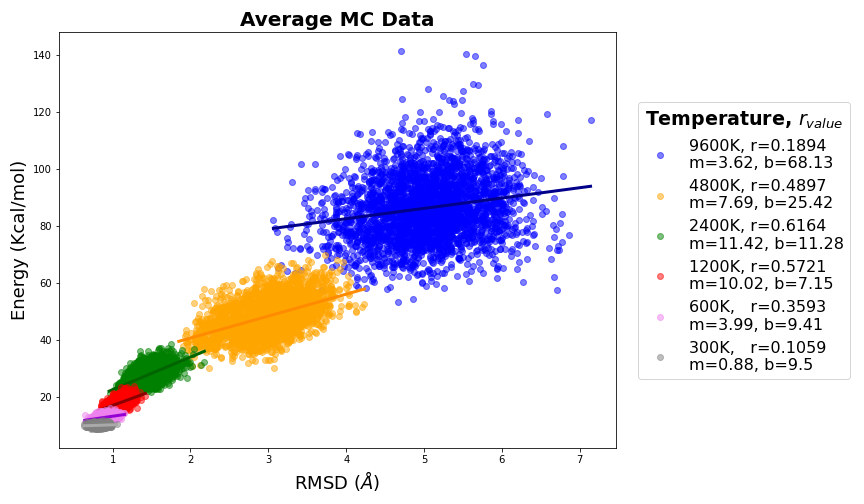

In [24]:
plt.close()
fig = plt.figure(figsize=(12,7))

rmsd_avg, energy_avg, slopes, intercepts = [], [], [], []

for i in range(len(temperatures)-1,-1,-1):#list(reversed((temperatures))):
  rmsd, energy = [], []
  for file in gz_files:
    data = ReadGz(path+temperatures[i]+'/'+file)
    rmsd.append(data['RMSD']); energy.append(data['Energy'])
    #plt.plot(data['RMSD'], data['Energy'], 'o', label=temp)
  
  rmsd = np.average(np.array(rmsd), axis=0); energy = np.average(np.array(energy), axis=0)
  slope, intercept, r_value, p_value, std_err = linregress(rmsd, energy)

  rmsd_avg.append(rmsd); energy_avg.append(energy);
  slopes.append(slope); intercepts.append(intercept);

  rmsd_array = np.linspace(min(rmsd), max(rmsd), 1000)
  if len(temperatures[i]) == 4:
           label = temperatures[i]+',   r={}\nm={}, b={}'.format(round(r_value,4), round(slope,2), round(intercept,2))
  else:    label = temperatures[i]+', r={}\nm={}, b={}'.format(round(r_value,4), round(slope,2), round(intercept,2))
  plt.plot(rmsd, energy, 'o', label=label, color=colors[i], alpha=0.5)
  plt.plot(rmsd_array, slope*rmsd_array+intercept, color='dark'+colors[i], lw=3)
  
plt.xlabel('RMSD ($\AA$)', fontsize='18'); plt.ylabel('Energy (Kcal/mol)', fontsize='18')
plt.legend(title='Temperature, $r_{value}$', bbox_to_anchor=(1.025, .85), fontsize='16', title_fontproperties={'weight':'bold', 'size':'19'})
plt.title('Average MC Data', fontsize='20', fontweight='bold')
#plt.ylim((0, 100)); plt.xlim((0, 10))


fig.tight_layout()

In [18]:
slopes

[3.6184764044456856,
 7.68682339141138,
 11.422871366777738,
 10.020911405056225,
 3.986522322388861,
 0.883188806506202]

In [19]:
intercepts

[68.12871859786313,
 25.42049534574583,
 11.276014607019762,
 7.1498102901460445,
 9.410568694352545,
 9.500465834738257]